In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("CarPrice_Assignment.csv")
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data=data.drop(["car_ID"],axis=1)
data=data.drop(["symboling"],axis=1)
data=data.drop(["CarName"],axis=1)
data=data.drop(["fueltype"],axis=1)
data=data.drop(["doornumber"],axis=1)
data=data.drop(["carbody"],axis=1)
data=data.drop(["carheight"],axis=1)
data=data.drop(["enginetype"],axis=1)
data=data.drop(["cylindernumber"],axis=1)
data=data.drop(["stroke"],axis=1)
data=data.drop(["compressionratio"],axis=1)
data=data.drop(["peakrpm"],axis=1)
data=data.drop(["aspiration"],axis=1)

In [4]:
data.head(5)

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,rwd,front,88.6,168.8,64.1,2548,130,mpfi,3.47,111,21,27,13495.0
1,rwd,front,88.6,168.8,64.1,2548,130,mpfi,3.47,111,21,27,16500.0
2,rwd,front,94.5,171.2,65.5,2823,152,mpfi,2.68,154,19,26,16500.0
3,fwd,front,99.8,176.6,66.2,2337,109,mpfi,3.19,102,24,30,13950.0
4,4wd,front,99.4,176.6,66.4,2824,136,mpfi,3.19,115,18,22,17450.0


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
N_C=data.select_dtypes(include=["object"])
N_C

,drivewheel,enginelocation,fuelsystem
0,rwd,front,mpfi
1,rwd,front,mpfi
2,rwd,front,mpfi
3,fwd,front,mpfi
4,4wd,front,mpfi
...,...,...,...
200,rwd,front,mpfi
201,rwd,front,mpfi
202,rwd,front,mpfi
203,rwd,front,idi


In [7]:
for column in N_C:
    data[column]=le.fit_transform(data[column])

In [8]:
data.head(5)

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,2,0,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,13495.0
1,2,0,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,16500.0
2,2,0,94.5,171.2,65.5,2823,152,5,2.68,154,19,26,16500.0
3,1,0,99.8,176.6,66.2,2337,109,5,3.19,102,24,30,13950.0
4,0,0,99.4,176.6,66.4,2824,136,5,3.19,115,18,22,17450.0


In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [10]:
x=data.drop(["price"],axis=1)
y=data["price"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

<Axes: >

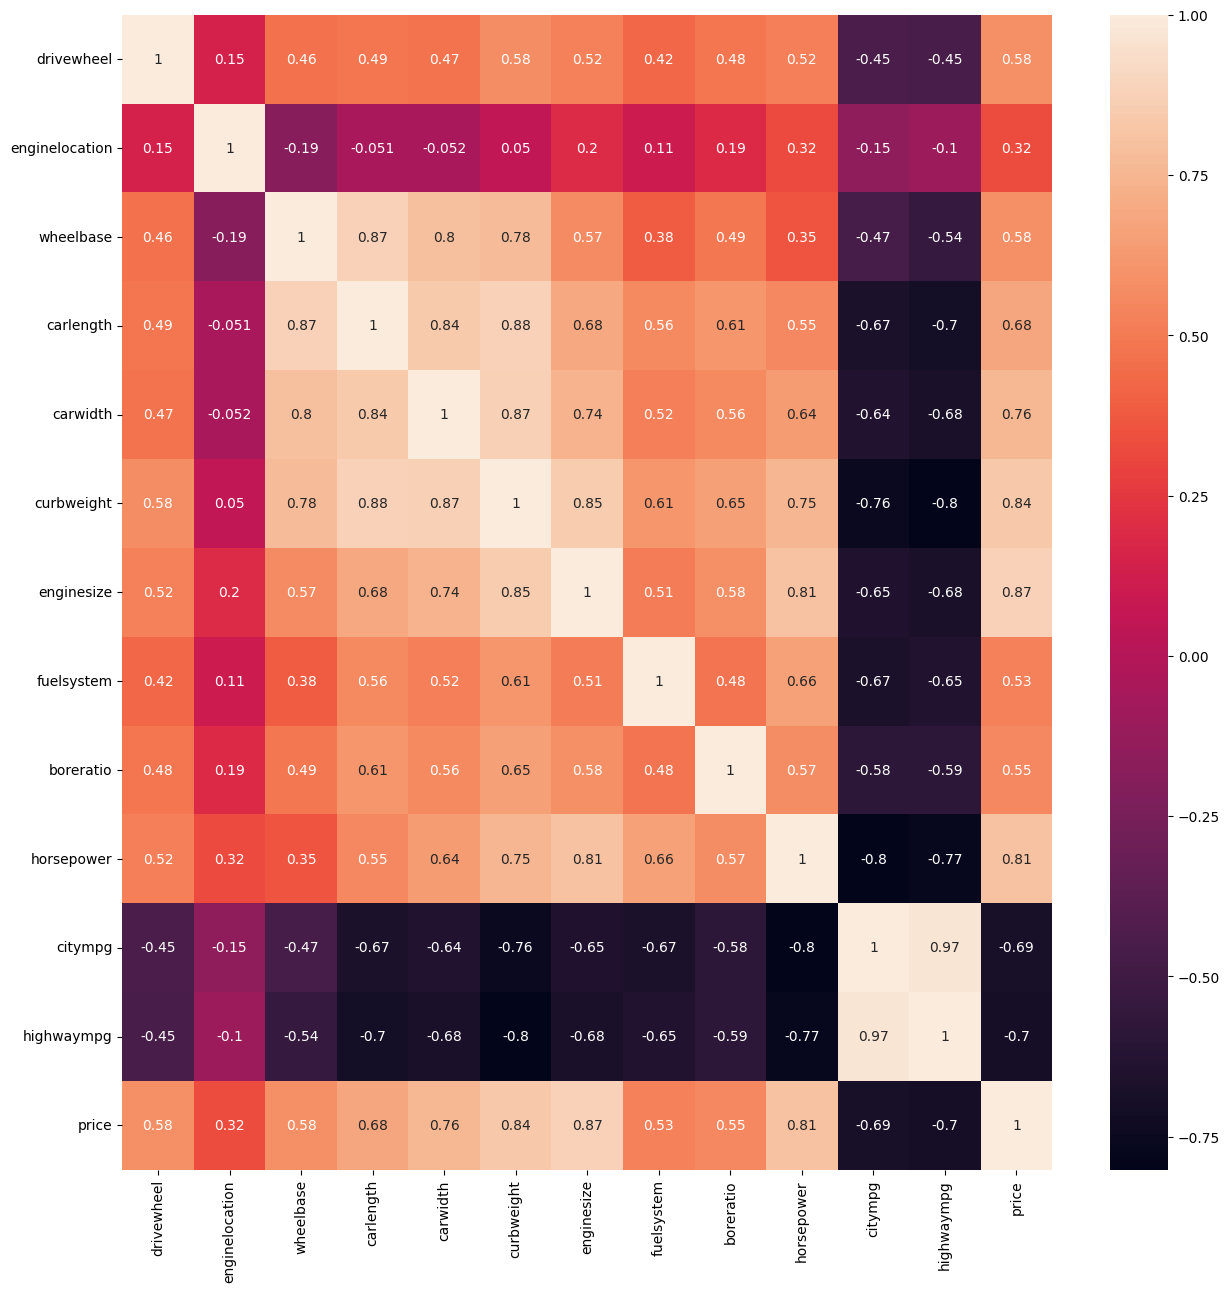

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

Ridge Regression:

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
R=Ridge()
parameter={"alpha":[0.01,0.1,1,10,100]}

In [20]:
ridgecv=GridSearchCV(R,parameter,scoring="r2",cv=5)

In [21]:
ridgecv.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [22]:
y_pred=ridgecv.predict(x_test_scaled)
y_pred

array([23555.52546831, 17055.50805729, 10499.67148278, 12753.34524589,
       24690.02411565,  6435.97047197,  6727.83717742,  7626.46737345,
        9648.76615552,  7374.02164667, 15234.63784062,  8467.40487835,
       15320.79890493, 12054.50352508, 36381.48200782,  6044.44457332,
       -1987.0867053 , 16232.00203947, 10965.56983547,  9311.80874637,
       11783.49389236, 19443.67701818,  6472.06992309,  3619.41608394,
        6241.29005894, 24700.8100873 , 14287.94178598, 16468.30563745,
        6389.37247001, 16197.06494878, 24167.55229731,  6192.3778036 ,
        5867.02564673, 21637.27702465,  8290.01875511, 23984.05634845,
        9172.85651249, 10374.91805157,  5208.0616296 , 16419.79135381,
        9035.54687334])

In [26]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 10}
0.8529535913002044


With the Ridge Regression we got the accuracy of total 85%
